<a href="https://colab.research.google.com/github/Eunhasuiin/Tensorflow-DeepLearning-Programing/blob/main/TDP_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Mean Square Error loss function

In [ ]:
import numpy as np

#Mean square error calculate without tensorflow
def MSE(y,t): return np.sum((y-t)**2)/t.size 

t=np.array([1,2,3,4])
y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t))

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t))

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


In [ ]:
import numpy as np
import tensorflow as tf

#calculate with reduce_mean() and square()
def MSE(y, t): return tf.reduce_mean(tf.square(y-t)) # It calculate first (y-t) ** 2 and get mean

t=np.array([1,2,3,4])
y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t).numpy()) # if there is not .numpy() -> MSE(y1,t) ==  tf.Tensor(1.875, shape=(), dtype=float64)

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t).numpy()) # if there is not .numpy() -> MSE(y2,t) ==  tf.Tensor(0.25, shape=(), dtype=float64)

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


In [ ]:
import numpy as np
import tensorflow as tf

MSE=tf.keras.losses.MeanSquaredError() #make MSE to made funcion from keras

t=np.array([1,2,3,4])
t=tf.convert_to_tensor(t, dtype=tf.float32) #t is int32

y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t).numpy()) # if there is not .numpy() -> MSE(y1,t) ==  tf.Tensor(1.875, shape=(), dtype=float64)

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t).numpy()) # if there is not .numpy() -> MSE(y2,t) ==  tf.Tensor(0.25, shape=(), dtype=float64)

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


# II Numpy simple linear regrssion

## 1. Gredient Decent

epoch=0: w=  0.9217, b=  0.0550, loss=  0.2144
epoch=10: w=  0.9920, b=  0.0607, loss=  0.0010
epoch=20: w=  0.9925, b=  0.0574, loss=  0.0009
epoch=30: w=  0.9929, b=  0.0543, loss=  0.0008
epoch=40: w=  0.9933, b=  0.0514, loss=  0.0007
epoch=50: w=  0.9936, b=  0.0486, loss=  0.0007
epoch=60: w=  0.9940, b=  0.0459, loss=  0.0006
epoch=70: w=  0.9943, b=  0.0434, loss=  0.0005
epoch=80: w=  0.9946, b=  0.0411, loss=  0.0005
epoch=90: w=  0.9949, b=  0.0389, loss=  0.0004
epoch=100: w=  0.9952, b=  0.0368, loss=  0.0004
epoch=110: w=  0.9954, b=  0.0348, loss=  0.0003
epoch=120: w=  0.9957, b=  0.0329, loss=  0.0003
epoch=130: w=  0.9959, b=  0.0311, loss=  0.0003
epoch=140: w=  0.9961, b=  0.0294, loss=  0.0002
epoch=150: w=  0.9963, b=  0.0278, loss=  0.0002
epoch=160: w=  0.9965, b=  0.0263, loss=  0.0002
epoch=170: w=  0.9967, b=  0.0249, loss=  0.0002
epoch=180: w=  0.9969, b=  0.0235, loss=  0.0002
epoch=190: w=  0.9971, b=  0.0223, loss=  0.0001
w=0.9972, b=0.0212, loss=0.0001

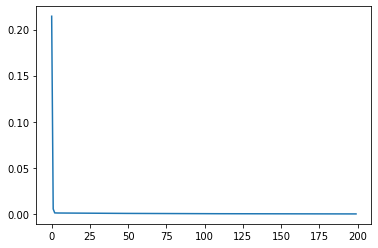

In [ ]:
import numpy as np
def MSE(y,t): return np.sum((y-t)**2)/t.size  #loss function

x=np.arange(12)
t=np.arange(12)
loss_list=[]

#hyper_parameter setting
w=0.5
b=0
lr=1e-2

for epoch in range(200):
  y=w*x+b #2_dim linear function
  dW=np.sum((y-t)*x)*2/(x.size) # It came from f`(MSE)= (1/N) * sum((y-t)**2) y to w*x+b and partial derivative w
  dB=np.sum((y-t))*2/(x.size) # It came from f`(MSE)= (1/N) * sum((y-t)**2) y to w*x+b and partial derivative b

  w-=lr*dW #find next value of w
  b-=lr*dB #find next value of b

  y=w*x+b
  loss=MSE(y,t) #caclulate result of this epoch
  loss_list.append(loss)
  if not epoch % 10: print("epoch={}: w={:>8.4f}, b={:>8.4f}, loss={:>8.4f}".format(epoch, w, b, loss))

print("w={:>.4f}, b={:>.4f}, loss={:>.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

epoch=0: w=  0.5094, b=  0.0015, loss=  7.6908
epoch=10: w=  0.6136, b=  0.0152, loss=  3.3681
epoch=20: w=  0.7001, b=  0.0265, loss=  5.1572
epoch=30: w=  0.7708, b=  0.0353, loss=  1.6832
epoch=40: w=  0.8193, b=  0.0415, loss=  1.6821
epoch=50: w=  0.8597, b=  0.0468, loss=  0.8679
epoch=60: w=  0.8917, b=  0.0508, loss=  0.4422
epoch=70: w=  0.9130, b=  0.0537, loss=  0.1934
epoch=80: w=  0.9324, b=  0.0561, loss=  0.1766
epoch=90: w=  0.9449, b=  0.0576, loss=  0.1045
w=  0.9547, b=  0.0588, loss=  0.0826


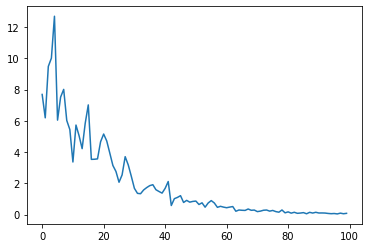

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def MSE(y,t):
  return np.sum((y-t)**2) / t.size

x=np.arange(12)
t=np.arange(12)

#set hyper parameter
w=0.5
b=0
lr=0.0001
loss_list=[]

train_size=t.size
batch_size=4
K=train_size // batch_size

for epoch in range(100):
  loss=0
  for step in range(K):
    mask=np.random.choice(train_size, batch_size)
    x_batch=x[mask]
    t_batch=t[mask]

    y= w*x_batch + b
    dW=np.sum((y-t_batch)*x_batch)*2 / batch_size
    dB=np.sum((y-t_batch))*2 / batch_size

    w-= lr*dW
    b-= lr*dB

    y=w*x_batch + b
    loss+=MSE(y, t_batch)
  loss/=K
  loss_list.append(loss)

  if not epoch % 10: print("epoch={}: w={:>8.4f}, b={:>8.4f}, loss={:>8.4f}".format(epoch, w, b, loss))

print("w={:>8.4f}, b={:>8.4f}, loss={:>8.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

#III auto derivative calculation

In [7]:
import tensorflow as tf

x=tf.Variable(2.0); y=tf.Variable(3.0)

with tf.GradientTape() as tape: 
  z=x**2+y**2
dx,dy=tape.gradient(z,[x,y]) #auto calculate partial derivative

print(dx.numpy()); print(dy.numpy())

4.0
6.0


In [21]:
import tensorflow as tf

x=tf.Variable(2.0); y=tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape: #persistnt is simply maintain function INF
  tape.watch(x); 
  tape.watch(y)
  z=x**2+y**2
dx=tape.gradient(z,x)
dy=tape.gradient(z,y)
#dx,dy=tape.gradient(z,[x,y]) #auto calculate partial derivative

print(dx.numpy()); print(dy.numpy())

4.0
6.0


In [22]:
import tensorflow as tf

x=tf.Variable(2.0); y=tf.Variable(3.0)

with tf.GradientTape(watch_accessed_variables=False) as tape: #watch_accessed_variable is mean if you want GradientTape watch your Global variable
  tape.watch(x); 
  tape.watch(y)
  z=x**2+y**2

dx,dy=tape.gradient(z,[x,y]) #auto calculate partial derivative

print(dx.numpy()); print(dy.numpy())

4.0
6.0


In [25]:
import tensorflow as tf

x=tf.Variable(3.0)

with tf.GradientTape() as tape2:
  with tf.GradientTape() as tape1:
    y= x**3
  dy=tape1.gradient(y,x)
dy2=tape2.gradient(dy,x)

print(dy.numpy())
print(dy2.numpy())

27.0
18.0


#IV simple linear regression with tensorflow

w=0.9951, b=0.0370, loss=0.0004


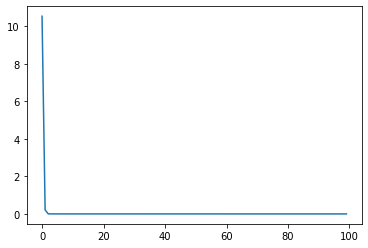

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x=np.arange(12)
t=np.arange(12)


#hyper parameter
w=tf.Variable(0.5)
b=tf.Variable(0.0)

lr=0.01

loss_list=[]
for epoch in range(100):
  with tf.GradientTape() as tape:
    y=w*x+b
    loss=tf.reduce_mean(tf.square(y-t))
  loss_list.append(loss)

  dW, dB=tape.gradient(loss,[w,b]) #loss값을 기준으로 하는 w와 b의 편미분 값
  w.assign_sub(dW*lr)
  b.assign_sub(dB*lr)

print("w={:>.4f}, b={:>.4f}, loss={:>.4f}".format(w.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()

w=0.9986, b=0.0104, batch loss=0.0000


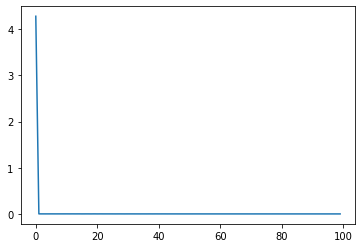

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x=np.arange(12)
t=np.arange(12)

#hyper parameter
w=tf.Variable(0.5)
b=tf.Variable(0.0)
lr=0.01

train_size=x.size
batch_size=4
K=train_size//batch_size

loss_list=[]

for epoch in range(100):
  batch_loss=0.0
  for step in range(K):
    mask=np.random.choice(train_size, batch_size)
    x_batch=x[mask]
    t_batch=t[mask]

    with tf.GradientTape() as tape:
      y=w*x_batch + b
      loss=tf.reduce_mean(tf.square(y-t_batch))

    dW, dB = tape.gradient(loss,[w,b])
    w.assign_sub(lr*dW)
    b.assign_sub(lr*dB)
    batch_loss += loss.numpy()

  batch_loss/=K #loss의 평균 산출
  loss_list.append(batch_loss)

print("w={:>.4f}, b={:>.4f}, batch loss={:>.4f}".format(w.numpy(), b.numpy(), batch_loss))

plt.plot(loss_list)
plt.show()  